# Определение возраста покупателей


# Описание проекта

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей. Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:

- анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
- контролировать добросовестность кассиров при продаже алкоголя.

Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.

# Наши цели
- Изучить основы работы с изображениями.
- Познакомиться с библиотекой Keras.
- Разобраться, что такое полносвязные и свёрточные сети.
- Научиться обучать модель ResNet.

# План по выполнению проекта
1. Провести исследовательский анализ набора фотографий.
2. Подготовить данные к обучению.
3. Обучить нейронную сеть и рассчитать её качество.

## Исследовательский анализ данных

### Вводная часть

Ознакомимся с инструкцией по выполнению проекта.

Нашей метрикой качества будет MAE.

План выполнения проекта такой:
- В этом уроке проведем исследовательский анализ набора данных в Jupyter. Затем скачиваем свою тетрадь Jupyter Notebook.
- В 4-м уроке обучим модель в GPU-тренажёре и сохраним результат вывода модели на экран.
- В 5-м уроке объединим в финальной тетради Jupyter Notebook исследовательский анализ данных, код и вывод модели. Затем проанализируем результат обучения модели.

### Описание данных

Данные взяты с сайта [ChaLearn Looking at People](http://chalearnlap.cvc.uab.es/dataset/26/description/). Они находятся в папке `/datasets/faces/`. 

В нашем распоряжении есть одна папка со всеми изображениями (`/final_files`) и CSV-файл `labels.csv` с двумя колонками: `file_name` и `real_age`. 

Извлечь данные из папки нам поможет новый метод [ImageDataGenerator](https://keras.io/preprocessing/image/) —`flow_from_dataframe(dataframe, directory, ...)`.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вводная-часть" data-toc-modified-id="Вводная-часть-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вводная часть</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подключение-библиотеки" data-toc-modified-id="Подключение-библиотеки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подключение библиотеки</a></span></li><li><span><a href="#Загрузка-данных-и-изучение-датасет" data-toc-modified-id="Загрузка-данных-и-изучение-датасет-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Загрузка данных и изучение датасет</a></span></li><li><span><a href="#График-распределения-возраста-человека" data-toc-modified-id="График-распределения-возраста-человека-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>График распределения возраста человека</a></span></li><li><span><a href="#Вывод-изображений" data-toc-modified-id="Вывод-изображений-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод изображений</a></span><ul class="toc-item"><li><span><a href="#Фотографии-с-самым-молодым-человеком" data-toc-modified-id="Фотографии-с-самым-молодым-человеком-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Фотографии с самым молодым человеком</a></span></li><li><span><a href="#Фотографии-с-самым-старейшим-человеком" data-toc-modified-id="Фотографии-с-самым-старейшим-человеком-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Фотографии с самым старейшим человеком</a></span></li></ul></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Предобученная-модель-ResNet50" data-toc-modified-id="Предобученная-модель-ResNet50-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобученная модель ResNet50</a></span></li><li><span><a href="#Вывод-на-консольное-окно" data-toc-modified-id="Вывод-на-консольное-окно-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод на консольное окно</a></span></li></ul></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li></ul></div>

### Подключение библиотеки

In [2]:
# Подключение библиотеки
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib.image import imread

### Загрузка данных и изучение датасет

In [3]:
# Загрузка данных
labels = pd.read_csv('/datasets/faces/labels.csv')

In [4]:
# Узнаем содержимое
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
# Рассмотрим детально о датасате
display(labels.describe(include='all'))

,file_name,real_age
count,7591,7591.000000
unique,7591,NaN
top,002968.jpg,NaN
freq,1,NaN
mean,NaN,31.201159
std,NaN,17.145060
min,NaN,1.000000
25%,NaN,20.000000
50%,NaN,29.000000
75%,NaN,41.000000


Здесь на основе полученного результата можно сделать вывод, что чаще всего в фотографиях встречаются люди с возрастом `30 лет`.

In [66]:
print('Количество людей с возрастом 1 года:', labels[labels['real_age'] == labels['real_age'].min()]['real_age'].value_counts().sum())

print('Количество люди с возрастом 100 лет:', labels[labels['real_age'] == labels['real_age'].max()]['real_age'].value_counts().sum())

Количество людей с возрастом 1 года: 149
Количество люди с возрастом 100 лет: 1


In [7]:
print('Размер выборки:', labels.shape)

Размер выборки: (7591, 2)


In [8]:
# Проверим на пропущенные значения
labels.isna().sum()

file_name    0
real_age     0
dtype: int64

In [9]:
# Проверяем на дублиующие значения
labels.duplicated().sum()

0

Нет пропущенных значений, а также дублирующих. Теперь можно составить график и по нему сделать вывод и начать рассуждения.

### График распределения возраста человека

Часто встречаемый возраст человека: 25 и 30


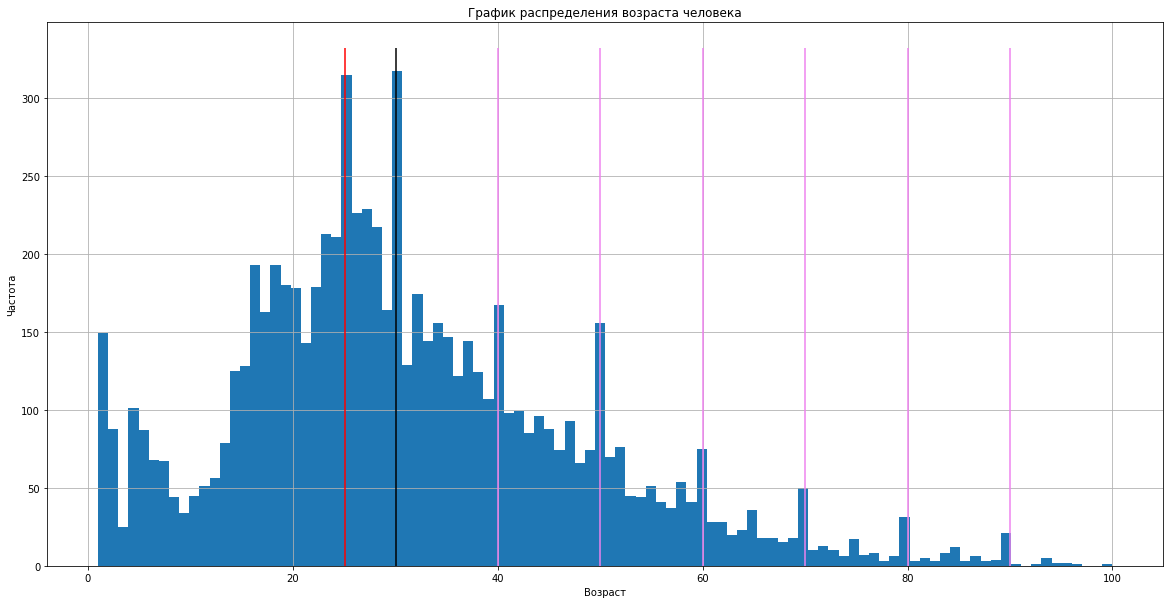

In [17]:
plt.figure(figsize=(20, 10))
plt.hist(labels['real_age'], bins=(100))
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('График распределения возраста человека')
plt.grid(True)

# Age 25
plt.vlines(
    x = (labels['real_age'].median() + labels['real_age'].mean()) / 2 - 5,
    ymin = 0,
    ymax = labels['real_age'].value_counts().max() + 15,
    colors = 'red',
)

# Age 30
plt.vlines(
    x = (labels['real_age'].median() + labels['real_age'].mean()) / 2,
    ymin = 0,
    ymax = labels['real_age'].value_counts().max() + 15,
    colors = 'black',
)

# Age 40, 50, 60, 70, 80, 90
for age_decade in range(40, 100, 10):
    plt.vlines(
        x = age_decade,
        ymin = 0,
        ymax = labels['real_age'].value_counts().max() + 15,
        colors = 'violet',
    )

print(f'Часто встречаемый возраст человека: {round((labels.real_age.median() + labels.real_age.mean()) / 2 - 5)} и {round((labels.real_age.median() + labels.real_age.mean()) / 2)}')

Возраст людей, которые помечены красной и черной линией на графике, часто встречается в датасете - 25 и 30 лет. А розовый (фиолетовый) цвет линии на графике, который заполняется каждый 10 лет, свидительствует о том, что в датасете возраст человека заполняли вручную по многими причинами, особенно отсутствия информации возраста человека к фотографии.  

Этот график напоминает на пуассоновское распределение, т.е. это статистическое распределение, которое показывает, сколько раз событие может произойти в течение определенного периода времени. 

### Вывод изображений 

In [19]:
datagen = ImageDataGenerator(rescale=1./255)

data_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345
)

Found 7591 validated image filenames.


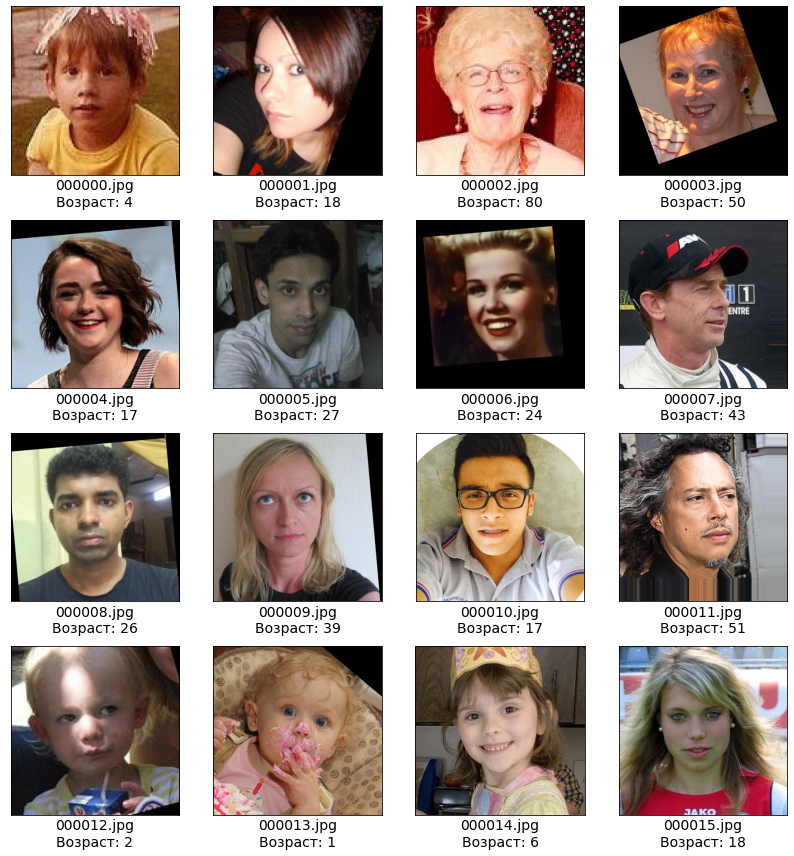

In [31]:
fig = plt.figure(figsize=(12,12));
for i in range(0,16):
    image = imread(data_gen_flow.directory+labels['file_name'][i])    
    fig.add_subplot(4,4,i+1)
    
    plt.imshow(image)
    
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(labels['file_name'][i]+'\nВозраст: '+str(labels['real_age'][i]),fontsize=14)
    plt.tight_layout()

Рассмотрим фотографий с возрастом 1 года, проверим на подлинность

#### Фотографии с самым молодым человеком

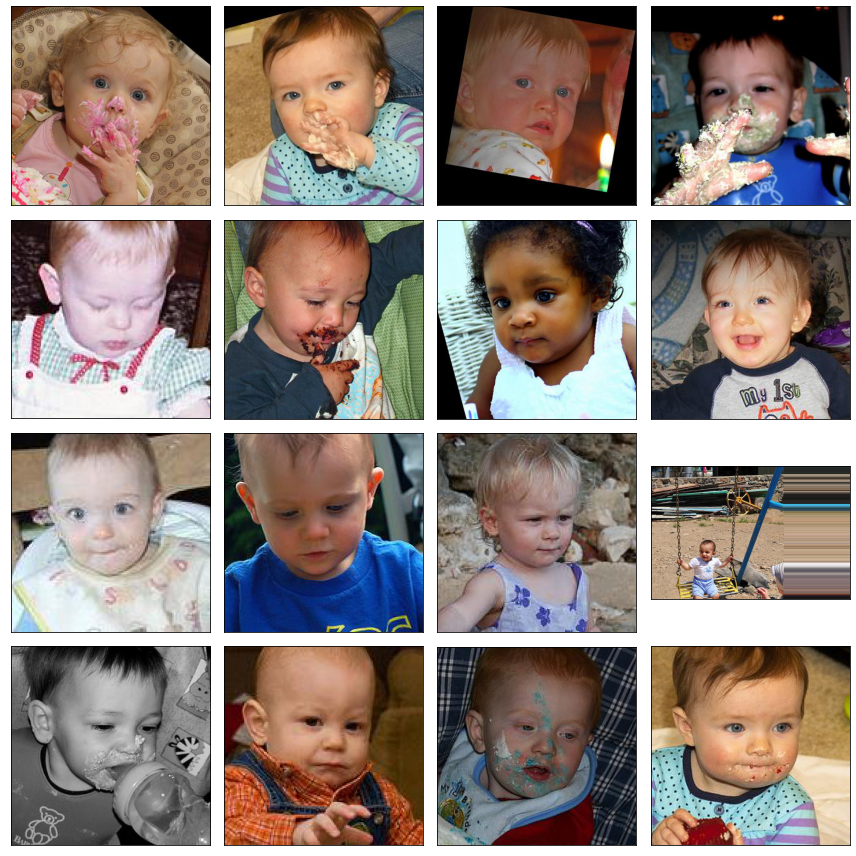

In [54]:
fig = plt.figure(figsize=(12,12))

age_one_year = labels[labels['real_age'] == labels['real_age'].min()].reset_index(drop=True)

for i in range(0,16):
    image = imread(data_gen_flow.directory+age_one_year['file_name'][i])    
    fig.add_subplot(4,4,i+1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Вроде нет каких то аномалий, в порядке. Возраст человека по фотографии установлен адекватно. Теперь рассмотрим самый старейший человек

#### Фотографии с самым старейшим человеком

К сожалению, нам известно, что у нас есть одна фотографии, в котором человеку 100 лет. Рассмотрим изображения

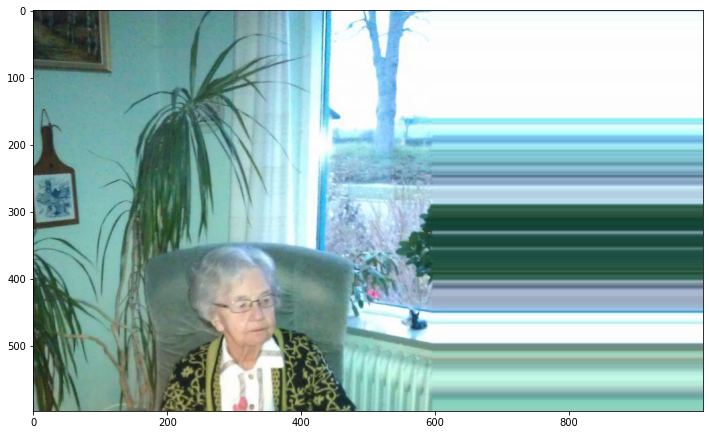

In [79]:
plt.figure(figsize=(12,12))
plt.imshow(imread(data_gen_flow.directory + labels[labels['real_age'] == labels['real_age'].max()]['file_name'].reset_index(drop=True)[0]))

Вполне соответствует, если не рассмотреть на наличии артефактов

### Промежуточный вывод

На основе вышеперечисленных можно сделать вывод, что чаще всего в датасете встречаются люди с возрастом `30 лет`. А размер выборки соствляет `7591`. Качество изображения с датасет вполне хорошее, мало встречается артефакты, например, у фотографии `000011.jpg` нижняя часть изображения видны.

**Чтобы оценить, достаточно ли имеющихся данных, можно учесть следующие факторы:**

- Разнообразие данных: важно, чтобы датасет был достаточно разнообразным и покрывал широкий спектр возрастов, а также различные этнические группы, пол и другие факторы, которые могут влиять на внешний вид лица. Чем больше разнообразие в данных, тем лучше модель сможет обучиться на различных типах лиц и предсказывать возраст для разных групп.


- Количество данных: более объемный датасет обычно позволяет модели лучше обобщать и обучаться на различных примерах. В данном случае, 7591 запись может быть достаточным количеством данных для некоторых моделей регрессии, но оно может быть недостаточным для более сложных моделей или в случае требования высокой точности предсказания. Например, для научных целей, снятых со спутниковых съемков для исследования уровня глубины океана, рельефа и т.д. 

**В связи с этим, можно предпринять следующие шаги:**

- Аугментация данных: применение различных методов аугментации данных, таких как повороты, сдвиги, изменение размера, изменение яркости и контраста и другие, может помочь увеличить разнообразие и количество данных. Это позволяет модели обучаться на большем количестве вариаций и улучшает ее обобщающую способность.


- Использование предобученных моделей: если доступны предобученные модели, особенно в области анализа изображений и обработки лиц, можно использовать их как основу для своей модели. Это позволяет использовать предварительно обученные веса и архитектуру модели, что может быть полезно при ограниченном количестве данных.


- Добавление дополнительных данных: если у нас есть возможность дополнить еще данные 

## Обучение модели

### Предобученная модель ResNet50

```python

# Подключение библиотеки
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

import matplotlib.pyplot as plt
import numpy as np


# Загрузка обучающей выборки
def load_train(path):
    datagen = ImageDataGenerator(
        # Получаем 25% долю от данных для валидационной проверки
        validation_split=0.25, 
        # Генерирует случайным образом зеральное отражение для повышения качеств обучения
        horizontal_flip=True, 
        # Уменьшение масштаба модели
        rescale=1. / 255
    )
    
    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow


# Загрузка тестовой выборки
def load_test(path):
    datagen = ImageDataGenerator(        
        # Получаем 25% долю от данных для валидационной проверки
        validation_split=0.25, 
        # Уменьшение масштаба модели
        rescale=1. / 255
    )
    
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=pd.read_csv(path + 'labels.csv'),
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow


# In[ ]:


# Создание модели
def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False) 
    
    # Инициализируем модель глубокого обучения
    model = Sequential()
    # Добавляем модель ResNet50
    model.add(backbone)
    # Добавляем модель GlobalAveragePooling2D
    model.add(GlobalAveragePooling2D())
    # Добавляем модель Dense с активацией "relu"
    model.add(Dense(1, activation='relu'))
    
    # Для настройки гиперпараметров: Основной настраиваемый гиперпараметр в алгоритме Adam — скорость обучения (learning rate). 
    # Это шаг градиентного спуска, с которого алгоритм стартует.
    # По умолчанию он равен 0.01. Уменьшение шага иногда может замедлить обучение, но улучшить итоговое качество модели.
    optimizer_adam = Adam(lr=0.01)
    
    # Также устанавливаем параметры, отвечающие за обучение
    model.compile(optimizer=optimizer_adam, loss='mean_squared_error', metrics=['mae'])
    
    return model

# Запуск модели
def train_model(model, train_data, test_data, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
 
    return model

```

### Вывод на консольное окно

```

# Train for 356 steps, validate for 119 steps
# Epoch 1/10
# 2023-05-15 13:26:52.221544: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
# 2023-05-15 13:26:52.539556: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
# 356/356 - 64s - loss: 215.6088 - mae: 10.6122 - val_loss: 705.9674 - val_mae: 21.5358
# Epoch 2/10
# 356/356 - 67s - loss: 84.5707 - mae: 6.9750 - val_loss: 164.0117 - val_mae: 9.6336
# Epoch 3/10
# 356/356 - 69s - loss: 54.7848 - mae: 5.6227 - val_loss: 80.7079 - val_mae: 6.6989
# Epoch 4/10
# 356/356 - 68s - loss: 42.7224 - mae: 4.9490 - val_loss: 92.2831 - val_mae: 7.5083
# Epoch 5/10
# 356/356 - 68s - loss: 33.5699 - mae: 4.4030 - val_loss: 83.9321 - val_mae: 7.0734
# Epoch 6/10
# 356/356 - 43s - loss: 26.1638 - mae: 3.8782 - val_loss: 71.7095 - val_mae: 6.4015
# Epoch 7/10
# 356/356 - 42s - loss: 21.6567 - mae: 3.5772 - val_loss: 74.1264 - val_mae: 6.4298
# Epoch 8/10
# 356/356 - 43s - loss: 18.9548 - mae: 3.3102 - val_loss: 69.2546 - val_mae: 6.2176
# Epoch 9/10
# 356/356 - 43s - loss: 16.3927 - mae: 3.0635 - val_loss: 63.2988 - val_mae: 5.9638
# Epoch 10/10
# 356/356 - 42s - loss: 13.6584 - mae: 2.8123 - val_loss: 65.7167 - val_mae: 6.0708
# WARNING:tensorflow:sample_weight modes were coerced from
#   ...
#     to  
#   ['...']
# 119/119 - 10s - loss: 65.7167 - mae: 6.0708
# Test MAE: 6.0708

```

## Анализ обученной модели

После обучения с применением технологии `ResNet50` **Среднее абсолютная ошибка - MSE** дали неплохие результаты - `6,0708`. Это самая низкая показатель С.А.О _(чем ближе к 0, тем лучше)_. Значит модель редко ошибается по предсказанию возраста человека по фотографии.

Для обучения нейроной сети были использованы следующие использованные архиектуры (backbone, head):
- backbone:
```
    backbone = ResNet50(input_shape=input_shape,
                weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                include_top=False)
```
Мы применили `backbone` для заморозки, т.к. она позволяет избавиться от переобучения и повысить скорость обучения сети:  градиентному спуску считать производные для замороженных слоёв не нужно. Потому что у нас небольшой датасет: размер составляет `7591`. Если на таком датасете обучить ResNet50, то она гарантированно переобучится: в ней слишком много параметров — порядка 23 млн. После чего у сети будут идеальные предсказания на обучающей выборке и случайные — на тестовой.

- head:
```
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
```
    Почему так устанавлены параметры, потому что мы сначала замораживаем в целях избежания переобучения с готовой преодобученной модели `resnet50_weights_tf_dim_ordering_tf_kernels_notop`. Затем добавляем слой `GlobalAveragePooling2D`, чтобы выполнять глобальную операцию среднего пулина, т.е. `average pooling` по пространственным измерениям, которые извлекли еще с признаков. Затем добавили последний выходной полносвязный слой - `Dense`, который принимает входные признаки после глобального среднего пулинга и генерирует предсказания для задачи регрессии - возраста человека.

А теперь ознакомимся со списками параметров обучения:
- Размер батча (`batch_size`) задается в функции загрузки данных (`ImageDataGenerator`), в нашем случае по-умолчанию стоит `None`.
- Оптимизатор (`optimizer`) определен как Adam с коэффициентом скорости обучения (`learning rate`) 0.01.
- Функция потерь (`loss`) установлена как среднеквадратичная ошибка (`mean_squared_error`).
- Метрика (`metrics`) для оценки модели установлена на среднюю абсолютную ошибку (`mean absolute error`, `MAE`).

Чтобы сказать, что модель достигнула необходимые им метрики, наблюдалось ли переобучение, сначала снова рассмотрим на полученную информацию после обучения (см. выше):

- Значение функции потерь (`loss`) уменьшается с каждой эпохой как на обучающей выборке, так и на валидационной выборке. Это говорит о том, что модель успешно учится и снижает ошибку на обоих наборах данных.

- Значение средней абсолютной ошибки (`MAE`) также уменьшается с каждой эпохой как на обучающей выборке, так и на валидационной выборке. Это означает, что модель все более точно предсказывает возраст и улучшает свою производительность.

Извлекем полученные значения, чтобы построить график (Предположим, что данные обучены и извлекли на одном и том же компьютере)

In [12]:
data_info = pd.DataFrame({
    'loss':[215.6088, 84.5707, 54.7848, 42.7224, 33.5699, 26.1638, 21.6567, 18.9548, 16.3927, 13.6584], 
    'mae': [10.6122, 6.9750, 5.6227, 4.9490, 4.4030, 3.8782, 3.5772, 3.3102, 3.0635, 2.8123],
    'val_loss': [705.9674, 164.0117, 80.7079, 92.2831, 83.9321, 71.7095, 74.1264, 69.2546, 63.2988, 65.7167],
    'val_mae': [21.5358, 9.6336, 6.6989, 7.5083, 7.0734, 6.4015, 6.4298, 6.2176, 5.9638, 6.0708],
    'time [s]': [64, 67, 69, 68, 68, 43, 42, 43, 43, 42]
})
data_info

,loss,mae,val_loss,val_mae,time [s]
0,215.6088,10.6122,705.9674,21.5358,64
1,84.5707,6.9750,164.0117,9.6336,67
2,54.7848,5.6227,80.7079,6.6989,69
3,42.7224,4.9490,92.2831,7.5083,68
4,33.5699,4.4030,83.9321,7.0734,68
5,26.1638,3.8782,71.7095,6.4015,43
6,21.6567,3.5772,74.1264,6.4298,42
7,18.9548,3.3102,69.2546,6.2176,43
8,16.3927,3.0635,63.2988,5.9638,43
9,13.6584,2.8123,65.7167,6.0708,42


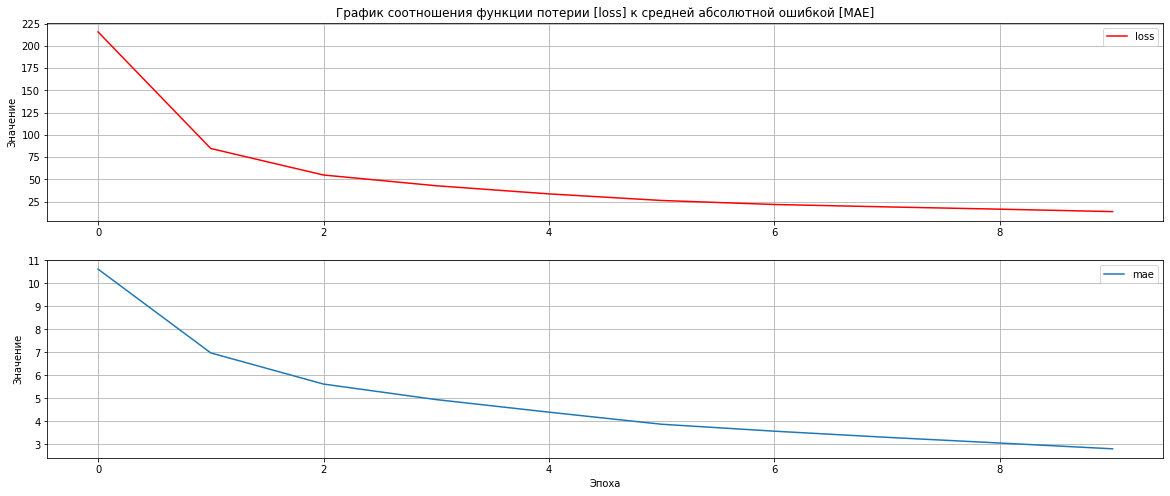

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8))

axs[0].plot(data_info['loss'], color='red')
axs[0].set_ylabel('Значение')
axs[0].legend(['loss'])
axs[0].set_title('График соотношения функции потерии [loss] к средней абсолютной ошибкой [MAE]')
axs[0].grid(True)

axs[1].plot(data_info['mae'])
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Значение')
axs[1].legend(['mae'])
axs[1].grid(True)

Как и видим, что вместе с другими значениями функция убывается. Следовательно, на основе этого графика можно сделать вывод, что модель успешно учится и снижает ошибку на обоих наборах данных и все более точно предсказывает возраст и улучшает свою производительность.

**Как понять, что модель переобучена**

**Если наблюдается ситуация, когда сначала качество на валидации росло вместе с качеством на трейне, а потом в какой-то момент качество на валидации начало падать, но при этом на трейне оно продолжило расти, значит началось переобучение.**